In [1]:
import matplotlib.pyplot as plt; plt.ion()
%matplotlib inline
import numpy as np
from astropy.table import Table, hstack, vstack
from astropy.io import fits
import os, re

from matplotlib import ticker, rc
plt.style.use('default')
rc('font',**{'family':'serif'})
rc('text', usetex=True)
import seaborn as sns
#ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_theme(font="serif", style="darkgrid", font_scale=1.2)

In [2]:
from superbit_class import SuperBIT
sb = SuperBIT()

In [3]:
def set_rc_params():
    '''
    Set figure parameters
    This should be a config one day
    '''
    plt.rcParams.update({'figure.facecolor':'w'})
    plt.rcParams.update({'axes.linewidth': 1.3})
    plt.rcParams.update({'xtick.labelsize': 16})
    plt.rcParams.update({'ytick.labelsize': 16})
    plt.rcParams.update({'xtick.major.size': 8})
    plt.rcParams.update({'xtick.major.width': 1.3})
    plt.rcParams.update({'xtick.minor.visible': True})
    plt.rcParams.update({'xtick.minor.width': 1.})
    plt.rcParams.update({'xtick.minor.size': 6})
    plt.rcParams.update({'xtick.direction': 'out'})
    plt.rcParams.update({'ytick.major.width': 1.3})
    plt.rcParams.update({'ytick.major.size': 8})
    plt.rcParams.update({'ytick.minor.visible': True})
    plt.rcParams.update({'ytick.minor.width': 1.})
    plt.rcParams.update({'ytick.minor.size':6})
    plt.rcParams.update({'ytick.direction':'out'})
    plt.tick_params(axis='both', which='both', length=5)

    return



In [24]:
blue_cat = Table.read('cl_m4.1e14_z0.45_forecast_blue_gals_joined_master_cat.fits')
lum_cat = Table.read('cl_m4.1e14_z0.45_forecast_lum_gals_joined_master_cat.fits')
shape_cat = Table.read('cl_m4.1e14_z0.45_forecast_shape_gals_joined_master_cat.fits')


wgb = (blue_cat['snr_win'] > 5) #& (blue_cat['redshift'] > 0.45)
wgl = (lum_cat['snr_win'] > 5) #& (lum_cat['redshift'] > 0.45)
wgs = (shape_cat['snr_win'] > 5) #& (shape_cat['redshift'] > 0.45)

blue_cat = blue_cat[wgb]
lum_cat = lum_cat[wgl]
shape_cat = shape_cat[wgs]


In [17]:
lum_cat.info()

<Table length=278767>
    name      dtype     class     n_bad
------------ ------- ------------ -----
      sex_id   int64       Column     0
          ra float64       Column     0
         dec float64       Column     0
    redshift float64       Column     0
    mag_auto float32       Column     0
 magerr_auto float32       Column     0
   flux_auto float32       Column     0
fluxerr_auto float32       Column     0
     snr_win float32       Column     0
 COSMOS_flux float64       Column     0
  COSMOS_mag float64       Column     0
      ab_mag float32 MaskedColumn     2


###
### Convert to AB mags
###

In [19]:

ab_blue = sb.flux_to_abmag(blue_cat, band='b')
#ab_lum = sb.flux_to_abmag(lum_cat, band='lum')
#ab_shape = sb.flux_to_abmag(shape_cat, 'shape')

ab_lum = lum_cat['ab_mag']
ab_shape = shape_cat['ab_mag']

In [20]:
#blue_cat.add_column(ab_blue, name='ab_mag')
#lum_cat.add_column(ab_lum, name='ab_mag')
#hape_cat.add_column(ab_shape, name='ab_mag')

blue_cat.write('cl_m4.1e14_z0.45_forecast_blue_gals_joined_master_cat.fits', overwrite=True)
#lum_cat.write('cl_m4.1e14_z0.45_forecast_lum_gals_joined_master_cat.fits', overwrite=True)
#shape_cat.write('cl_m4.1e14_z0.45_forecast_shape_gals_joined_master_cat.fits', overwrite=True)

###
### First, let's do basic histogram
###

max depth b is 26.03030303030303
max depth lum is 25.8989898989899
max depth shape is 24.717171717171716


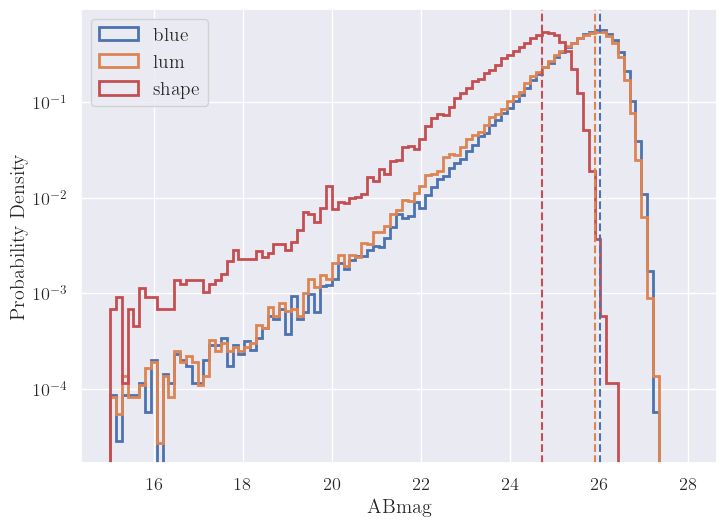

In [23]:
fig, ax = plt.subplots(1, 1, figsize=[7.5, 5.5], tight_layout=True)
bins = np.linspace(15, 28, 100)

n_b, bins_b, _= ax.hist(ab_blue[~np.isnan(ab_blue)], bins=bins, log=True, density=True, 
        color='C0', histtype='step', label='blue', lw=2)
n_l, bins_l, _= ax.hist(ab_lum[~np.isnan(ab_lum)], bins=bins, log=True, density=True, 
        color='C1', histtype='step', label='lum', lw=2)
n_s, bins_s, _= ax.hist(ab_shape[~np.isnan(ab_shape)], bins=bins, log=True, density=True, 
        color='C3', histtype='step', label='shape', lw=2)


depth_b = bins_b[n_b.argmax()]
print(f'max depth b is {depth_b}')

depth_l = bins_l[n_l.argmax()]
print(f'max depth lum is {depth_l}')

depth_s = bins_s[n_s.argmax()]
print(f'max depth shape is {depth_s}')

plt.axvline(depth_b, ls='--', color='C0')
plt.axvline(depth_l, ls='--', color='C1')
plt.axvline(depth_s, ls='--', color='C3')


ax.set_xlabel('ABmag')
ax.set_ylabel('Probability Density')
ax.legend(fontsize=14, loc='upper left')
fig.savefig('cl_m4.1e14_z0.45_joined_SN10_lumfunc_hist.pdf')

# S/N cut of 5

depth_b = bins_b[n_b.argmax()]
print(f'max depth b is {depth_b}')

depth_l = bins_l[n_l.argmax()]
print(f'max depth lum is {depth_l}')

depth_s = bins_s[n_s.argmax()]
print(f'max depth shape is {depth_s}')


In [14]:
# S/N cut of 10

depth_b = bins_b[n_b.argmax()]
print(f'max depth b is {depth_b}')

depth_l = bins_l[n_l.argmax()]
print(f'max depth lum is {depth_l}')

depth_s = bins_s[n_s.argmax()]
print(f'max depth shape is {depth_s}')

'''
max depth b is 26.03030303030303
max depth lum is 25.8989898989899
max depth shape is 24.717171717171716
'''


max depth b is 26.03030303030303
max depth lum is 25.8989898989899
max depth shape is 24.717171717171716


'\nmax depth b is 26.03030303030303\nmax depth lum is 25.8989898989899\nmax depth shape is 24.717171717171716\n'

In [135]:
# S/N behind cluster redshift of 0.45
depth_b = bins_b[n_b.argmax()]
print(f'max depth b is {depth_b}')

depth_l = bins_l[n_l.argmax()]
print(f'max depth lum is {depth_l}')

depth_s = bins_s[n_s.argmax()]
print(f'max depth shape is {depth_s}')

'''
max depth b is 26.03030303030303
max depth lum is 25.8989898989899
max depth shape is 24.717171717171716
'''

max depth b is 26.03030303030303
max depth lum is 25.8989898989899
max depth shape is 24.717171717171716


###
### Try a KDE
###

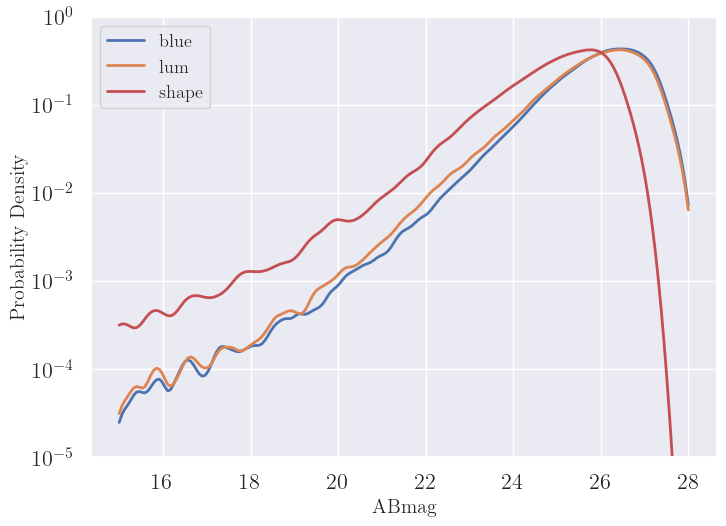

In [102]:
fig, ax = plt.subplots(1, 1, figsize=[7.5, 5.5], tight_layout=True)

sns.kdeplot(ab_blue[~np.isnan(ab_blue)], ax=ax, \
            multiple="layer", fill=False, common_grid=False, color='C0', clip=[15, 28], \
            lw=2, bw_adjust=1.5, log_scale=[False, True], label='blue')
sns.kdeplot(ab_lum[~np.isnan(ab_lum)], ax=ax, \
            multiple="layer", fill=False, color='C1', common_grid=False, clip=[15, 28], \
            lw=2, bw_adjust=1.5, log_scale=[False, True], label='lum')
sns.kdeplot(ab_shape[~np.isnan(ab_shape)], ax=ax, \
            multiple="layer", fill=False, color='C3', common_grid=False, clip=[15, 28], \
            lw=2, bw_adjust=1.5, log_scale=[False, True], label='shape')

ax.set_ylim(1e-5, 1)
ax.set_xlabel('ABmag')
ax.set_ylabel('Probability Density')

ax.legend()

fig.savefig('cl_m4.1e14_z0.45_joined_SN5_lumfunc_KDE.pdf')
#help(sns.kdeplot)


###
### Let's do classic luminosity function just to see it
###

100% completeness: 24.30
90% completeness: 25.53
50% completeness: 26.57


/var/folders/hh/3xbzpd6518n2t8_365818pnh0000gp/T/ipykernel_6001/3794502495.py:17: RuntimeWarning: divide by zero encountered in log
  fraction=np.log(n)/num


Text(0, 0.5, 'Probability Density')

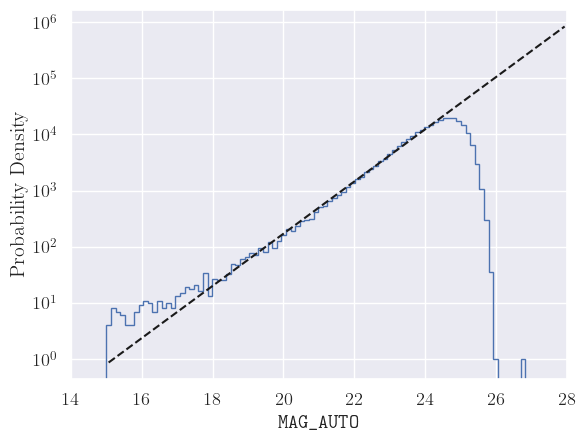

In [3]:
gals = blue_cat
dens_bool = False
n,bins=np.histogram(gals['mag_auto'], bins=100, range=[15, 28], density=dens_bool)
midpoints = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])

wg=(midpoints<24) & (midpoints>18)

fit=np.polyfit(midpoints[wg],np.log(n[wg]),1)
num = fit[0]*midpoints+fit[1]

plt.hist(gals['mag_auto'],histtype='step',bins=100,range=[15, 28], label='mock deep 3hr b', log=True, density=dens_bool)
plt.plot(midpoints,np.exp(num),'--k')
#plt.ylim(1e-5, 10)
plt.xlim(14, 28)

# OK, now to estimate 50% completeness
fraction=np.log(n)/num
enum=enumerate(fraction)
l = list(enum)

# Here you have to pick your point in the resulting l array.
# In one instance, I used ind=80 for ~100% completeness,
# used ind=93 for 90% completeness, and np.mean(93,94) for 50% completeness

complete=midpoints[71]
complete90=np.mean([midpoints[80],midpoints[81]])
complete50=np.mean([midpoints[88],midpoints[89]])

print(f'100% completeness: {complete:.2f}')
print(f'90% completeness: {complete90:.2f}')
print(f'50% completeness: {complete50:.2f}')

plt.xlabel(r'\texttt{MAG_AUTO}')
plt.ylabel('Probability Density')

100% completeness: 24.30
90% completeness: 25.53
50% completeness: 26.57


/var/folders/hh/3xbzpd6518n2t8_365818pnh0000gp/T/ipykernel_6001/3794502495.py:17: RuntimeWarning: divide by zero encountered in log
  fraction=np.log(n)/num


Text(0, 0.5, 'Probability Density')

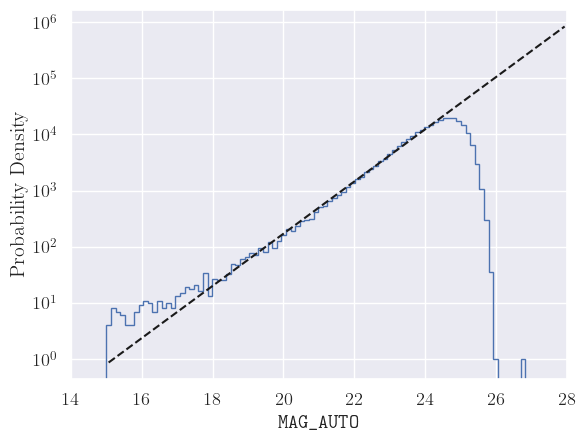

In [3]:
gals = blue_cat
dens_bool = False
n,bins=np.histogram(gals['mag_auto'], bins=100, range=[15, 28], density=dens_bool)
midpoints = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])

wg=(midpoints<24) & (midpoints>18)

fit=np.polyfit(midpoints[wg],np.log(n[wg]),1)
num = fit[0]*midpoints+fit[1]

plt.hist(gals['mag_auto'],histtype='step',bins=100,range=[15, 28], label='mock deep 3hr b', log=True, density=dens_bool)
plt.plot(midpoints,np.exp(num),'--k')
#plt.ylim(1e-5, 10)
plt.xlim(14, 28)

# OK, now to estimate 50% completeness
fraction=np.log(n)/num
enum=enumerate(fraction)
l = list(enum)

# Here you have to pick your point in the resulting l array.
# In one instance, I used ind=80 for ~100% completeness,
# used ind=93 for 90% completeness, and np.mean(93,94) for 50% completeness

complete=midpoints[71]
complete90=np.mean([midpoints[80],midpoints[81]])
complete50=np.mean([midpoints[88],midpoints[89]])

print(f'100% completeness: {complete:.2f}')
print(f'90% completeness: {complete90:.2f}')
print(f'50% completeness: {complete50:.2f}')

plt.xlabel(r'\texttt{MAG_AUTO}')
plt.ylabel('Probability Density')

100% completeness: 24.30
90% completeness: 25.27
50% completeness: 26.31


/var/folders/hh/3xbzpd6518n2t8_365818pnh0000gp/T/ipykernel_6001/1942757376.py:21: RuntimeWarning: divide by zero encountered in log
  fraction=np.log(n)/num


Text(0, 0.5, 'Probability Density')

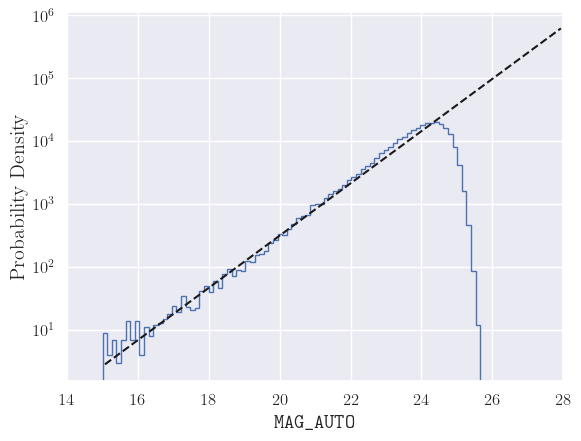

In [16]:
gals = lum_cat
dens_bool = False
n,bins=np.histogram(gals['mag_auto'], bins=100, range=[15, 28], density=dens_bool)
midpoints = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])

#sns.set_theme(font="serif", style="ticks", font_scale=1.2)
set_rc_params()
plt.tick_params(axis='both', which='both', length=5, width=1, labelsize=12)

wg=(midpoints<25) & (midpoints>17)

fit=np.polyfit(midpoints[wg],np.log(n[wg]),1)
num = fit[0]*midpoints+fit[1]

plt.hist(gals['mag_auto'],histtype='step',bins=100,range=[15, 28], label='mock deep 3hr lum', log=True, density=dens_bool)
plt.plot(midpoints,np.exp(num),'--k')
#plt.ylim(1e-5, 10)
plt.xlim(14, 28)

# OK, now to estimate 50% completeness
fraction=np.log(n)/num
enum=enumerate(fraction)
l = list(enum)

# Here you have to pick your point in the resulting l array.
# In one instance, I used ind=80 for ~100% completeness,
# used ind=93 for 90% completeness, and np.mean(93,94) for 50% completeness

complete=midpoints[71]
complete90=np.mean([midpoints[78],midpoints[79]])
complete50=np.mean([midpoints[86],midpoints[87]])

print(f'100% completeness: {complete:.2f}')
print(f'90% completeness: {complete90:.2f}')
print(f'50% completeness: {complete50:.2f}')

plt.xlabel(r'\texttt{MAG_AUTO}')
plt.ylabel('Probability Density')

In [12]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'bo

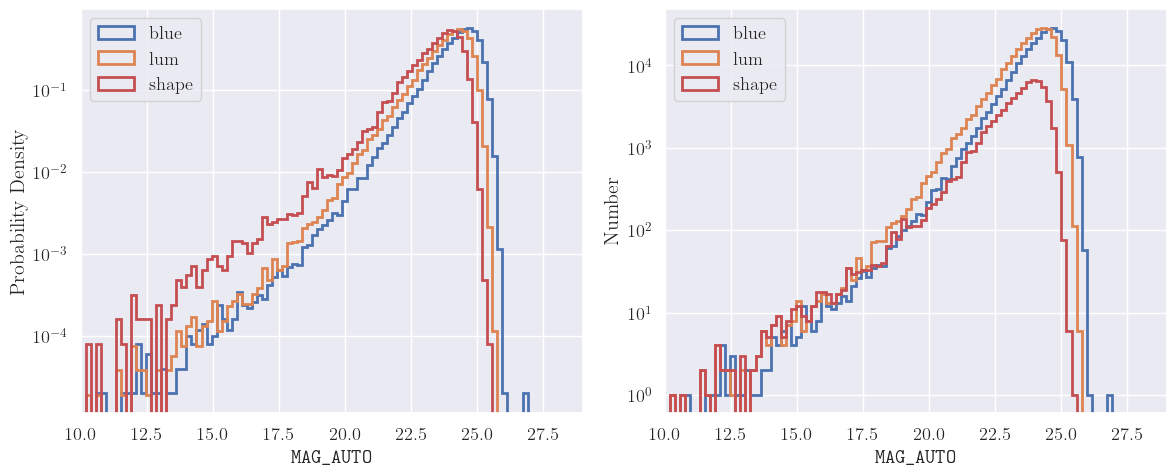

In [6]:
dens_bool = True
#mag_col = 'COSMOS_mag'
xlim = [10, 29]
mag_col = 'mag_auto'

fig, ax = plt.subplots(1, 2, figsize=[12, 5], tight_layout=True)

ax[0].hist(blue_cat[mag_col],histtype='step',bins=100,range=xlim, label='blue', \
         lw=2, log=True, density=dens_bool)
ax[0].hist(lum_cat[mag_col],histtype='step',bins=100,range=xlim, label='lum', \
         lw=2, log=True, density=dens_bool)
ax[0].hist(shape_cat[mag_col],histtype='step',bins=100,range=xlim, \
         label='shape', log=True, density=dens_bool, lw=2, color='C3')

ax[0].set_xlim(xlim)
#ax[0].set_ylim(5e-5, 1)
ax[0].set_xlabel(r'\texttt{MAG_AUTO}')
ax[0].set_ylabel('Probability Density')
ax[0].legend(loc = 'upper left')


dens_bool = False
#mag_col = 'COSMOS_mag'
ax[1].hist(blue_cat[mag_col],histtype='step',bins=100,range=xlim, label='blue', \
         lw=2, log=True, density=dens_bool)
ax[1].hist(lum_cat[mag_col],histtype='step',bins=100,range=xlim, label='lum', \
         lw=2, log=True, density=dens_bool)
ax[1].hist(shape_cat[mag_col],histtype='step',bins=100,range=xlim, \
         label='shape', log=True, density=dens_bool, lw=2, color='C3')

ax[1].set_xlim(xlim)
#ax[0].set_ylim(5e-5, 1)
ax[1].set_xlabel(r'\texttt{MAG_AUTO}')
ax[1].set_ylabel('Number')
ax[1].legend(loc = 'upper left')

fig.savefig('lum_func_classic_mag_auto.png')


## Alright, let's do the 5 sigma max PDF

That means, what: taking a density histogram thingy and doing argmax, then finding midpoint value of argmax

In [8]:
dens_bool = True
mag_col = 'mag_auto'
# Start with blue
n,bins=np.histogram(blue_cat[mag_col], bins=100, range=[15, 35], density=dens_bool)
midpoints_blue = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])
blue_depth = midpoints_blue[np.argmax(n)]
print(f'blue depth is {blue_depth}')

# Then with lum
n,bins=np.histogram(lum_cat[mag_col], bins=100, range=[15, 35], density=dens_bool)
midpoints_lum = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])
lum_depth = midpoints_lum[np.argmax(n)]
print(f'lum depth is {lum_depth}')

# End with shape
n,bins=np.histogram(shape_cat[mag_col], bins=100, range=[15, 35], density=dens_bool)
midpoints_shape = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])
shape_depth = midpoints_shape[np.argmax(n)]
print(f'shape depth is {shape_depth}')

blue depth is 24.700000762939453
lum depth is 24.299999237060547
shape depth is 24.100000381469727


In [195]:
dens_bool = False
mag_col = 'mag_auto'
# Start with blue
n,bins=np.histogram(blue_cat[mag_col], bins=100, range=[15, 35], density=dens_bool)
midpoints_blue = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])
blue_depth = midpoints_blue[np.argmax(n)]
print(f'blue depth is {blue_depth}')

# Then with lum
n,bins=np.histogram(lum_cat[mag_col], bins=100, range=[15, 35], density=dens_bool)
midpoints_lum = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])
lum_depth = midpoints_lum[np.argmax(n)]
print(f'lum depth is {lum_depth}')

# End with shape
n,bins=np.histogram(shape_cat[mag_col], bins=100, range=[15, 35], density=dens_bool)
midpoints_shape = np.array([(bins[i+1]+bins[i])*0.5 for i in range(len(bins)-1)])
shape_depth = midpoints_shape[np.argmax(n)]
print(f'shape depth is {shape_depth}')

blue depth is 24.700000762939453
lum depth is 24.299999237060547
shape depth is 24.100000381469727


In [2]:
cosmos_catalog = Table.read('/Users/j.mccleary/Research/SuperBIT/mock-data-forecasting/mock-catalogs/cosmos15_superbit2023_phot_shapes.csv')

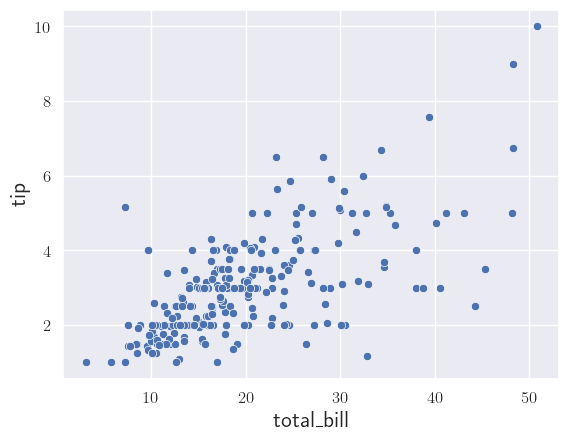

In [17]:
#fig, ax 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(font="serif", style="darkgrid", font_scale=1.2)
sns.set(rc={'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})

# generate sample data
tips = sns.load_dataset("tips")

# create a scatterplot with customized ticks
sns.scatterplot(x="total_bill", y="tip", data=tips)

# customize tick marks
plt.tick_params(axis='both', which='both', length=5, width=1, labelsize=12)

# display the plot
plt.show()